# Affichons l'action de Renault ainsi que les dividendes 

In [22]:
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
delta = timedelta(
     days=50,
    seconds=27,
   microseconds=10,
    milliseconds=29000,
    minutes=5,
    hours=8,
    weeks=2
 )
myDate = datetime.now(); 

test=myDate - timedelta(days=365*4)
bollingerfirstdate=test-timedelta(days=20)
before4=""+str(test.year)+"-"+str(test.month)+"-"+str(test.day)

renault = yf.Ticker("RNO.PA")
print(renault.history(start="2021-11-01", end="2021-11-23", interval="1d").keys())
renaultHistory = renault.history(start=before4, end=myDate, interval="1d")
bollinger = renault.history(start=bollingerfirstdate, end=myDate, interval="1d")
renaultHistory = renaultHistory.reset_index()
for i in ['Open', 'High', 'Close', 'Low']:
    renaultHistory[i]  =  renaultHistory[i].astype('float64')

fig = go.Figure(data=[go.Candlestick(x=renaultHistory['Date'],
open=renaultHistory['Open'],
high=renaultHistory['High'],
low=renaultHistory['Low'],
close=renaultHistory['Close'])])
fig.show()
"""renaultDividends = renault.history(start="2000-01-01", end="2021-01-01", interval="1y")
renaultDividends = renaultDividends.reset_index()
for i in ['Dividends']:
    renaultHistory[i]  =  renaultHistory[i].astype('float64')
"""
renault =  yf.Ticker("RNO.PA")
print(renault.dividends)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


Date
2000-07-03    0.76225
2001-06-05    0.91469
2002-05-15    0.92000
2003-05-15    1.15000
2004-05-17    2.10000
2005-05-13    1.80000
2006-05-15    2.40000
2006-10-19    0.30000
2007-05-15    3.10000
2007-10-18    0.36000
2008-05-08    1.20000
2008-05-12    3.80000
2011-05-11    0.30000
2012-05-10    1.16000
2013-05-10    1.72000
2014-05-12    1.72000
2015-05-13    1.90000
2016-05-13    2.40000
2017-06-21    3.15000
2018-06-21    3.55000
2019-06-18    3.55000
2023-05-17    0.25000
Name: Dividends, dtype: float64


# Affichons les bandes de Bollinger pour une analyse graphique 

In [23]:
def plotData(df, columns):
    df[columns].plot(figsize=(20,10))
    plt.figure()


    plt.show()

In [24]:
bollinger



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-16,16.554168,16.899503,15.867471,15.877395,1924827,0.0,0
2020-04-17,16.768514,16.897517,15.946858,16.254482,2786527,0.0,0
2020-04-20,16.629586,16.913396,16.083802,16.550200,1494615,0.0,0
2020-04-21,16.266392,16.506538,15.817855,16.206852,1551672,0.0,0
2020-04-22,16.391425,16.391425,15.678927,15.708697,2393474,0.0,0
...,...,...,...,...,...,...,...
2024-04-26,48.369999,49.070000,47.950001,48.549999,730066,0.0,0
2024-04-29,48.779999,49.779999,48.779999,49.470001,679747,0.0,0
2024-04-30,49.400002,49.700001,45.849998,46.740002,2382428,0.0,0


In [25]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
close=bollinger['Close']

close

Date
2020-04-16    15.877395
2020-04-17    16.254482
2020-04-20    16.550200
2020-04-21    16.206852
2020-04-22    15.708697
                ...    
2024-04-26    48.549999
2024-04-29    49.470001
2024-04-30    46.740002
2024-05-02    47.639999
2024-05-03    48.000000
Name: Close, Length: 1040, dtype: float64

In [26]:
t=moving_average(close, 20)
t.size-close.size

-19

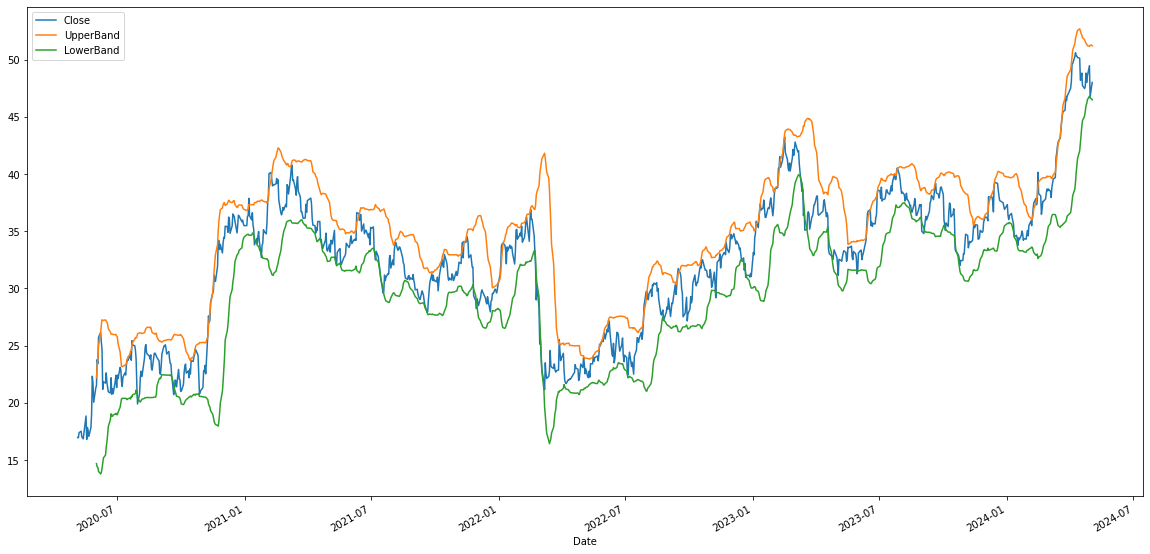

<Figure size 432x288 with 0 Axes>

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MMperiod,UpperBand,LowerBand,e26,e12,MACD,signal
Date,,,,,,,,,,,,,,
2020-05-06,17.217050,17.606046,16.919348,16.968966,1189833,0.0,0,NaN,NaN,NaN,16.968966,16.968966,0.000000,0.000000
2020-05-07,17.068199,17.223004,16.784390,16.961025,1365054,0.0,0,NaN,NaN,NaN,16.964843,16.964665,-0.000178,-0.000099
2020-05-08,17.177356,17.391701,16.957057,17.391701,984244,0.0,0,NaN,NaN,NaN,17.118209,17.131337,0.013128,0.005322
2020-05-11,17.713218,18.570598,17.526659,17.526659,1974470,0.0,0,NaN,NaN,NaN,17.232394,17.256125,0.023731,0.011558
2020-05-12,17.562383,17.608030,16.949118,17.022551,1002638,0.0,0,NaN,NaN,NaN,17.183730,17.192663,0.008933,0.010777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,48.369999,49.070000,47.950001,48.549999,730066,0.0,0,48.84725,51.217729,46.476771,47.255078,48.362213,1.107135,1.581322
2024-04-29,48.779999,49.779999,48.779999,49.470001,679747,0.0,0,48.98100,51.157881,46.804118,47.419147,48.532642,1.113495,1.487757
2024-04-30,49.400002,49.700001,45.849998,46.740002,2382428,0.0,0,48.94300,51.251300,46.634699,47.368840,48.256851,0.888011,1.367808


In [27]:
multiplier=2
period=20
df= pd.DataFrame()
df['UpperBand'] = bollinger['Close'].rolling(period).mean() + bollinger['Close'].rolling(period).std() * multiplier
df['LowerBand'] = bollinger['Close'].rolling(period).mean() - bollinger['Close'].rolling(period).std() * multiplier

def moyennecalcul(actionid,multiplier,period):
    action = yf.Ticker(actionid)
    myDate = datetime.now(); 
    bollingerfirstdate=myDate-timedelta(days=365*4)
    before20=""+str(bollingerfirstdate.year)+"-"+str(bollingerfirstdate.month)+"-"+str(bollingerfirstdate.day)
    bollinger= pd.DataFrame()
    bollinger = renault.history(start=before20, end=myDate, interval="1d")
    bollinger['MMperiod']=bollinger['Close'].rolling(period).mean()
    bollinger['UpperBand'] = bollinger['Close'].rolling(period).mean() + bollinger['Close'].rolling(period).std() * multiplier
    bollinger['LowerBand'] = bollinger['Close'].rolling(period).mean() - bollinger['Close'].rolling(period).std() * multiplier
    bollinger['e26'] = pd.Series.ewm(bollinger['Close'], span=26).mean()
    bollinger['e12'] = pd.Series.ewm(bollinger['Close'], span=12).mean()
    bollinger['MACD'] = bollinger['e12'] - bollinger['e26']
    bollinger['signal'] = pd.Series.ewm(bollinger['MACD'], span=9).mean()
    t=bollinger
    plotData(bollinger, ['Close','UpperBand','LowerBand'])
    return t

moyennecalcul("RNO.PA",multiplier,period)

# Déterminon si l'action est à vendre ou à acheter à l'aide du MACD

In [28]:
def createMACD(actionid):
    action = yf.Ticker(actionid)
    myDate = datetime.now(); 
    bollingerfirstdate=myDate-timedelta(days=20+period)
    before20=""+str(bollingerfirstdate.year)+"-"+str(bollingerfirstdate.month)+"-"+str(bollingerfirstdate.day)
    df= pd.DataFrame()
    df = renault.history(start=before20, end=myDate, interval="1d")
    df['e26'] = pd.Series.ewm(df['Close'], span=26).mean()
    df['e12'] = pd.Series.ewm(df['Close'], span=12).mean()
    df['MACD'] = df['e12'] - df['e26']
    df['signal'] = pd.Series.ewm(df['MACD'], span=9).mean()

    return df

In [29]:
def MACD(actionid):
    return (createMACD(actionid))['MACD'].tail(1).values.tolist()[0]

MACD("RNO.PA")

-0.21352945703276305

In [30]:
def signal(actionid):
    return (createMACD(actionid))['signal'].tail(1).values.tolist()[0]

signal("RNO.PA")

-0.12206585677592498

In [31]:
def diffMACD(a,b):
    if a-b==0 :
        return "Ne pas prendre de risque"
    elif a-b>0:
        return "Action à acheter"
    elif a-b<0:
        return "Action à vendre"
    
def venteMACD(actionid):
    return diffMACD(MACD(actionid),signal(actionid))
    


In [32]:
venteMACD("RNO.PA")

'Action à vendre'